### Question 1

#### Part a, b, c
Please see the accompanying report for solution.

#### Part d
We are given the credibility level of 95% and need to find both the equi-tailed and highest posterior density credible sets for $\lambda$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.stats import gamma

In [17]:
# Highest posterior density
# Use the optimization method as illustrated in Unit 4.11 Gamma Gamma by Aaron Reding

# Specify guesses for both lower and upper bounds
guess_lwr, guess_upr = 0.03, 1

# Define the function to be fed into fsolve for finding the roots of the equations
def conditions(x):
    a = 4  # Alpha of the Gamma distribution
    b = 5.7  # Beta of the Gamma distribution
    alpha = 0.05
    lwr, upr = x

    cond_1 = gamma.pdf(upr, a, scale = 1/b) - gamma.pdf(lwr, a, scale = 1/b)
    cond_2 = gamma.cdf(upr, a, scale = 1/b) - gamma.cdf(lwr, a, scale = 1/b) - (1 - alpha)

    return cond_1, cond_2

roots = fsolve(conditions, (guess_lwr, guess_upr))
roots


array([0.12500015, 1.39443792])

In [19]:
# Calculate k_alpha which is the horizontal line that creates the minimum width
low, high = round(roots[0], 4), round(roots[1], 4)

a, b = 4, 5.7

k_alpha = gamma.pdf(low, a, scale = 1/b)
k_alpha

0.16851687347167602

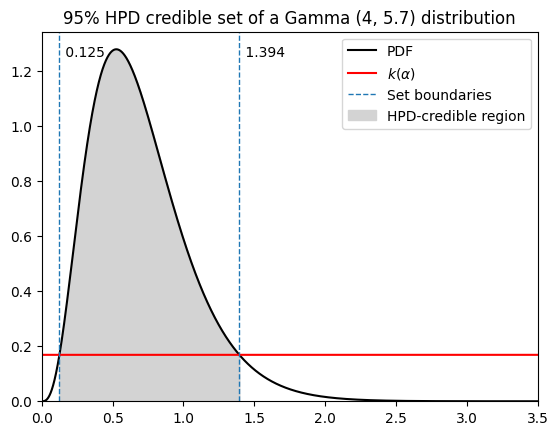

In [27]:
# Plot the distribution with 95% HPD as illustrated in Unit 4.10 Credible Intervals by Aaron Reding

xx = np.linspace(0, 100, 1000000)

pdf = gamma.pdf(xx, a = a, scale = 1/b)

# Density curve
plt.plot(xx, pdf, color = "black", label = "PDF")

# Additional markings
plt.plot(xx, np.full_like(xx, round(k_alpha, 4)), "r-", label = "$k(\\alpha)$")
plt.axvline(low, linestyle = "dashed", linewidth = 1, label = "Set boundaries")
plt.axvline(high, linestyle = "dashed", linewidth = 1)

plt.fill_between(
    xx,
    pdf,
    where = (low < xx) & (xx < high),
    color = "lightgrey",
    label = "HPD-credible region"                                                                              
    )

plt.legend()
plt.title("95% HPD credible set of a Gamma (4, 5.7) distribution")
plt.ylim(bottom = 0)
plt.xlim(left = 0, right = 3.5)
plt.text(low + 0.01, 1.25, f"{low: .3f}", rotation = 0)
plt.text(high + 0.01, 1.25, f"{high: .3f}", rotation = 0)
plt.show()

In [39]:
# Equi-tailed credible sets
# Use sampling method as illustrated in Unit 4.11 Gamma Gamma by Aaron Reding

# Use np.quantile for equitailed credible sets
a = 4
b = 5.7
n = 1000000
samples = gamma.rvs(a, scale = 1/b, size = n)

x = np.sort(samples)
alpha = 0.05

# Get the indices of the samples for 2.5th and 97.5th percentiles 
lower_idx = int(np.floor(alpha/2 * n))  
upper_idx = int(np.floor((1 - alpha/2) * n))

lower_eqt = x[lower_idx]
upper_eqt = x[upper_idx]

print(f"manual = {lower_eqt, upper_eqt}")

manual = (0.19173690930448994, 1.5369672510306827)


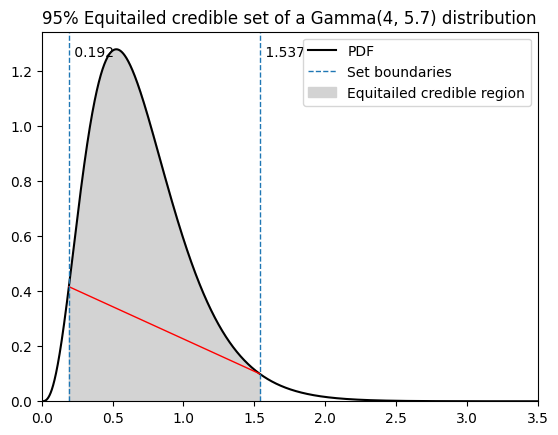

In [40]:
# Plot the distribution with 95% equitailed credible set as illustrated in Unit 4.10 Credible Intervals by Aaron Reding 

# Density curve
plt.plot(xx, pdf, color = "black", label = "PDF")

# Additional markings
plt.plot(
    [lower_eqt, upper_eqt],
    [gamma.pdf(lower_eqt, a, scale = 1/b), gamma.pdf(upper_eqt, a, scale = 1/b)],
    "r-",
    linewidth = 1,
)

plt.axvline(lower_eqt, linestyle = "dashed", linewidth = 1, label = "Set boundaries")
plt.axvline(upper_eqt, linestyle = "dashed", linewidth = 1)

plt.fill_between(
    xx,
    pdf,
    where = (lower_eqt < xx) & (xx < upper_eqt),
    color = "lightgrey",
    label = "Equitailed credible region"
)

plt.legend()
plt.title("95% Equitailed credible set of a Gamma(4, 5.7) distribution")
plt.ylim(bottom = 0)
plt.xlim(left = 0, right = 3.5)
plt.text(lower_eqt + 0.01, 1.25, f"{lower_eqt: .3f}", rotation = 0)
plt.text(upper_eqt + 0.01, 1.25, f"{upper_eqt: .3f}", rotation = 0)
plt.show()

#### Part e
In this part, we will find the posterial probability of hypotheses $H_{0}: \lambda \leq 1/2$

In [43]:
# Calculate posterior probability
round(gamma.cdf(0.5, a, scale = 1/b), 4)

0.3192

### Question 2
Please see the accompanying report for solution.

### Question 3
Please see the accompanying report for solution.